In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/train.csv')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Auto-detect display width
pd.set_option('display.max_colwidth', None) # Show full content of each cell

training_data = data.drop(columns=['SalePrice'])
target = data['SalePrice']

In [6]:
# Encode text data and normalise values
from sklearn.preprocessing import LabelEncoder

df_encoded = training_data.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
# Normalise data   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded = df_encoded.fillna(0)
training_data = df_encoded
print(training_data)

            Id  MSSubClass  MSZoning   LotFrontage    LotArea     Street  \
0    -1.730865    0.073375 -0.045532 -2.293718e-01  -0.207142   0.064238   
1    -1.728492   -0.872563 -0.045532  4.519361e-01  -0.091886   0.064238   
2    -1.726120    0.073375 -0.045532 -9.311018e-02   0.073480   0.064238   
3    -1.723747    0.309859 -0.045532 -4.564744e-01  -0.096897   0.064238   
4    -1.721374    0.073375 -0.045532  6.336182e-01   0.375148   0.064238   
5    -1.719002   -0.163109 -0.045532  6.790387e-01   0.360616   0.064238   
6    -1.716629   -0.872563 -0.045532  2.248335e-01  -0.043379   0.064238   
7    -1.714256    0.073375 -0.045532  2.428068e-16  -0.013513   0.064238   
8    -1.711883   -0.163109  1.537245 -8.652591e-01  -0.440659   0.064238   
9    -1.709511    3.147673 -0.045532 -9.106796e-01  -0.310370   0.064238   
10   -1.707138   -0.872563 -0.045532 -2.269135e-03   0.068469   0.064238   
11   -1.704765    0.073375 -0.045532  6.790387e-01   0.141030   0.064238   
12   -1.7023

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37255024640.0000 - mae: 178100.5312 - val_loss: 39909675008.0000 - val_mae: 182223.5781
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36995739648.0000 - mae: 177578.3594 - val_loss: 39828193280.0000 - val_mae: 182047.1406
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37855334400.0000 - mae: 179246.1562 - val_loss: 39387361280.0000 - val_mae: 181124.0781
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37267206144.0000 - mae: 176227.5000 - val_loss: 37963223040.0000 - val_mae: 178107.2812
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35658010624.0000 - mae: 173176.1562 - val_loss: 34565656576.0000 - val_mae: 170582.2656
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31501158400.0000 - mae: 163706.2656 - val_loss: 28492689408.0000 - val_mae: 155828.0000
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22622650368.0000 - mae: 141308.8438 - val_loss: 20613388288

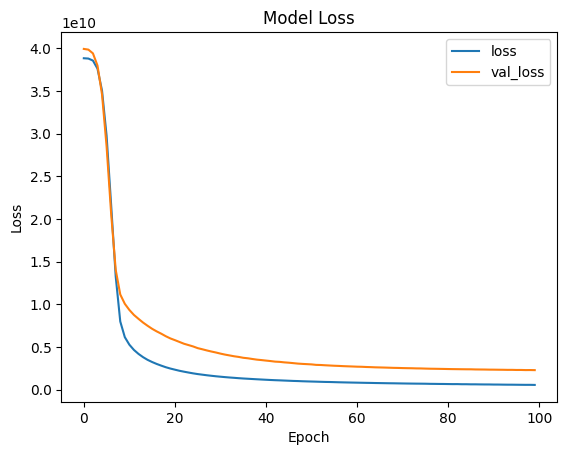

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(training_data.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) 
    ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(training_data, target, epochs=100, batch_size=32, validation_split=0.2)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# Save the model
model.save('models/house_price_model.h5')